<a href="https://colab.research.google.com/github/nnins25/DRONE-DETECT-SOUND-/blob/main/%EB%A9%80%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

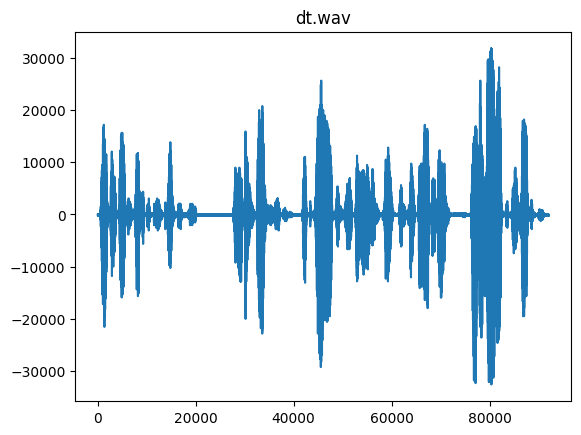

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

rate, data = wavfile.read('dt.wav')

plt.plot(data), plt.title('dt.wav')

wavfile.write('test.wav',rate, data)

In [ ]:
import pygame
import pygame.mixer
from time import sleep
def Play_sound(filename):
  pygame.mixer.init()
  sound = pygame.mixer.Sound(filename)
  tmp = sound.play()
  while tmp.get_busy():
    pygame.time.delay(1)

# Play_sound('dt.wav')

In [ ]:
rata = 40000
wavfile.write('test.wav',rate, data)
Play_sound('test.wav')

error: ALSA: Couldn't open audio device: No such file or directory

In [ ]:
data_autumn = data[::-1]
wavfile.write('test.wav',rate, data_autumn)
Play_sound('test.wav')

error: ALSA: Couldn't open audio device: No such file or directory

([<matplotlib.lines.Line2D at 0x7fc8d170d4f0>], Text(0.5, 1.0, 'dt.wav'))

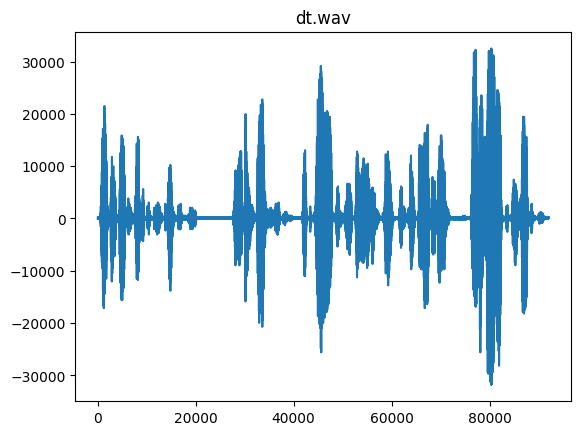

In [ ]:
rate, data = wavfile.read('dt.wav')
data = -data
wavfile.write('test.wav',rate, data)
plt.plot(data), plt.title('dt.wav')
# Play_sound('test.wav')

In [ ]:
rate

11025

In [ ]:
rate, data = wavfile.read('dt.wav')
data = data[::2] # == rate*2
wavfile.write('test.wav',rate, data)

In [ ]:
data.shape

(46043,)

In [ ]:
rate, data = wavfile.read('dt.wav')
# rate 조절 없이 느리게 하기
expended = np.zeros(len(data)*2, dtype = data.dtype)
expended[::2] = data
wavfile.write('test.wav',rate, expended)

In [ ]:
# 2/3배... == (1/3) * 2
rate, data = wavfile.read('dt.wav')
expended = np.zeros(len(data)*3, dtype = data.dtype)
expended[::2] = data
wavfile.write('test.wav',rate, expended)

ValueError: could not broadcast input array from shape (92085,) into shape (138128,)

-----------------------------------------------------------------

In [ ]:
A = 3 + 5j
A

(3+5j)

In [ ]:
import numpy as np
a = 3
b = 5
r = np.sqrt((a**2)+ np.power(b,2))
theta = np.arctan(b/a)
print(r,theta)

5.830951894845301 1.0303768265243125


In [ ]:
A = r * np.exp(1j*theta) # 1j 주의
A

np.complex128(3+5j)

In [ ]:
Mag = np.abs(A) # == r
Pha = np.angle(A) # == theta
print(Mag,Pha)

5.8309518948453 1.0303768265243125


In [ ]:
A = Mag * np.exp(1j*Pha)
A

np.complex128(2.9999999999999996+5j)

-----------------------

샘플링 신호
대역 제한된 아날로그 신호(ex 음성은 4kHz) 다시 아날로그 신호로 바꾸려면 2배 크게 샘플링해야 함.

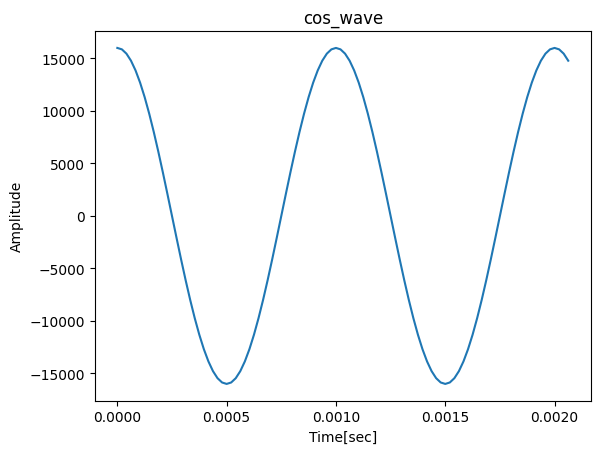

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 샘플링된 후 복원된 신호 그리기
A = 16000
f0 = 1000
fs = 48000
Duration = 1
num_samples = int(Duration*fs)
cos_wave = np.zeros(num_samples)

for x in range(num_samples):
  cos_wave[x] = A*np.cos(2*np.pi*(f0/fs)*x)
time = np.arange(0.0,1.0,1/fs)

plt.plot(time[:100],cos_wave[:100]), plt.title('cos_wave')
plt.xlabel('Time[sec]'), plt.ylabel('Amplitude')
plt.show()

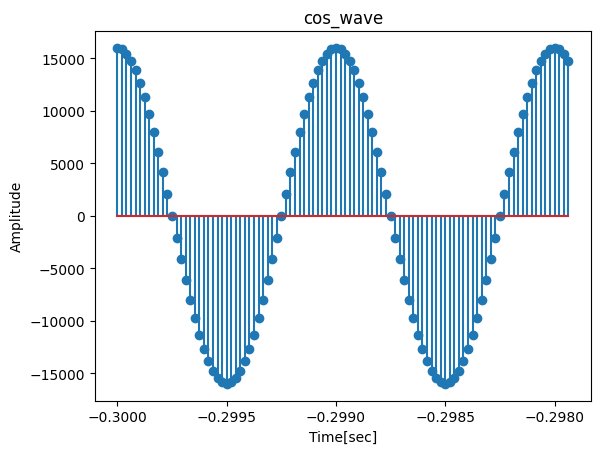

In [ ]:
A = 16000
f0 = 1000
fs = 48000
Duration = 1
tmin=-0.3
tmax=0.3

n = np.linspace(tmin,tmax,fs) # 샘플링 주파수 이용
n = np.arange(tmin,tmax,1/fs) # 샘플링 주기 이용
cos_wave = A*np.cos(2*np.pi*f0*n)

plt.stem(n[:100],cos_wave[:100]), plt.title('cos_wave') # 와! 이산신호로 비연쉬인~
plt.xlabel('Time[sec]'), plt.ylabel('Amplitude')
plt.show()

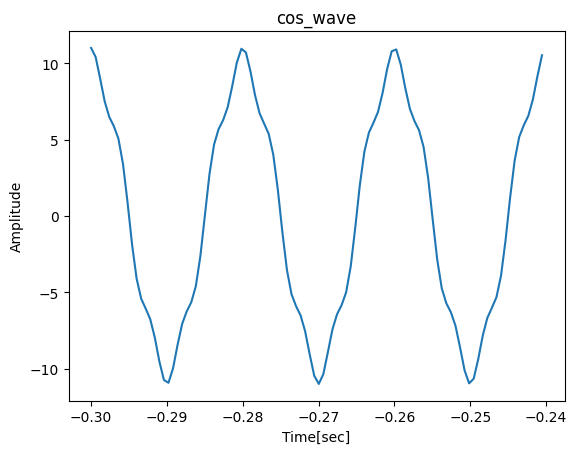

In [ ]:
A = [10,1]
f0 = [50,250]
fs = 1000
Duration = 1
tmin=-0.3
tmax=0.3

n = np.linspace(tmin,tmax,fs)

rlt = 0
for i in range(len(A)):
  cos_wave = A[i]*np.cos(2*np.pi*f0[i]*n)
  rlt += cos_wave

A = 2
f0 = 100
sin_wave = A*np.sin(2*np.pi*f0*n)
rlt += sin_wave

plt.plot(n[:100],rlt[:100]), plt.title('cos_wave')
plt.xlabel('Time[sec]'), plt.ylabel('Amplitude')
plt.show()


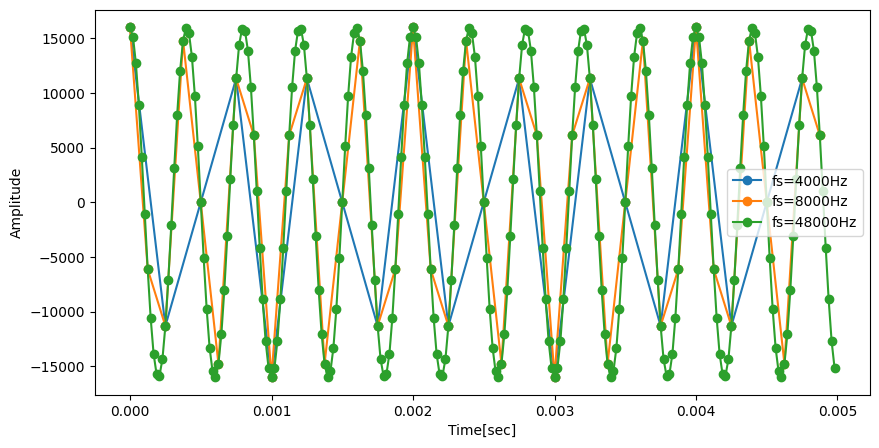

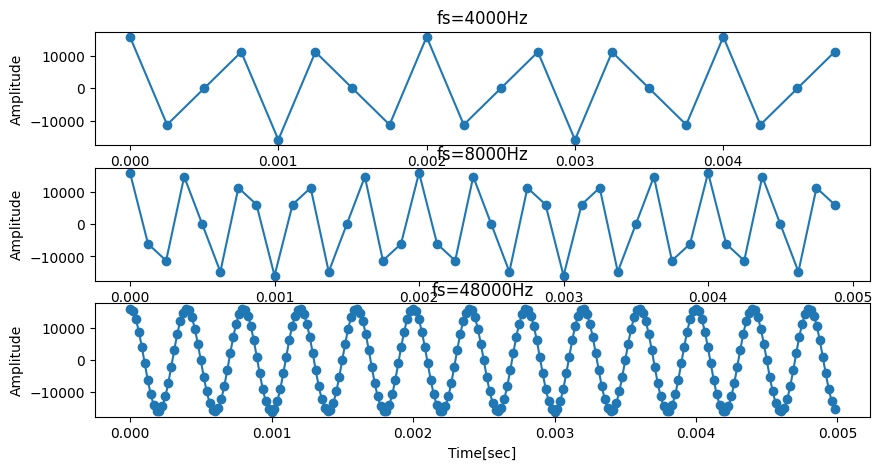

In [ ]:
A = 16000
f0 = 1000
start_time = 0
end_time = 0.005

plt.figure(figsize=(10,5))

fs_list = [4000,8000,48000]
for fs in fs_list:
  t = np.arange(start_time,end_time,1/fs)
  cos_wave = A*np.cos(2*np.pi*f0*t)
  plt.plot(t,cos_wave, marker ='o',label=f'fs={fs}Hz')

plt.xlabel('Time[sec]'), plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
for i,fs in enumerate(fs_list):
  t = np.arange(start_time,end_time,1/fs)
  cos_wave = A*np.cos(2*np.pi*f0*t)
  plt.subplot(len(fs_list),1,i+1)
  plt.plot(t,cos_wave, marker ='o')
  plt.title(f'fs={fs}Hz')
  plt.xlabel('Time[sec]'), plt.ylabel('Amplitude')

plt.show()

--------------------------------------------------------------------
# 9/16/화

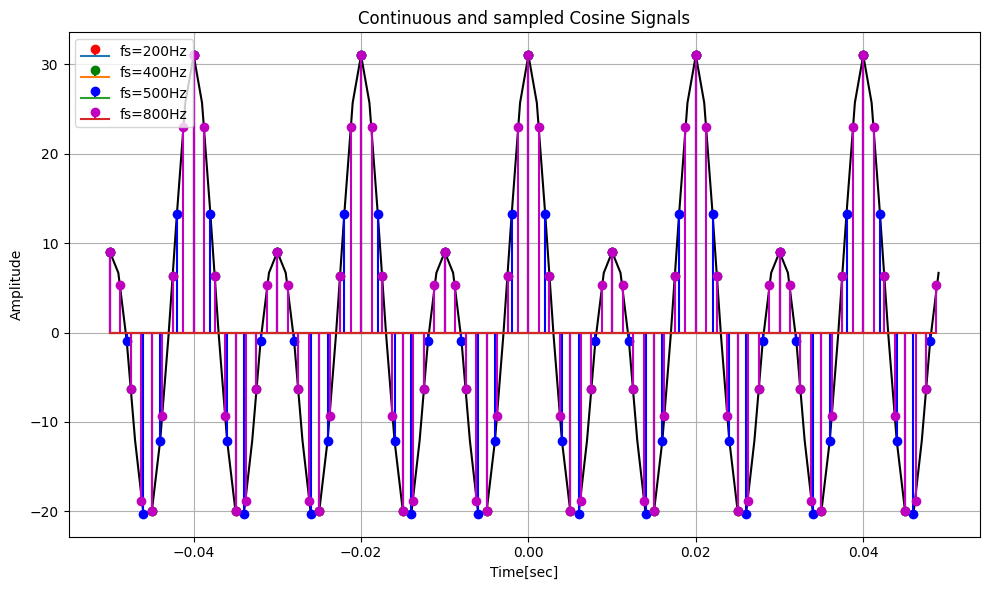

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 파라미터
Duration = [-0.05,0.05]
A1, f1 = 10, 100*np.pi
A2, f2 = 20, 200*np.pi
A3, f3 = 1, 500*np.pi

# (a)연속신호(fs_cont = 1000)
fs_cont = 1000
t_cont = np.arange(Duration[0],Duration[1],1/fs_cont)
cos_wave_cont = A1*np.cos(f1*t_cont) + A2*np.cos(f2*t_cont) + A3*np.cos(f3*t_cont)

plt.figure(figsize=(10,6))
plt.plot(t_cont,cos_wave_cont,c = 'black')
plt.xlabel('Time[sec]'), plt.ylabel('Amplitude')
# plt.show()

#(b)이산신호 stem plot(fs = 200,400,500,800)
fs_list = [200,400,500,800]
colors = ['r','g','b','m']
for fs,c in zip(fs_list,colors):
  t = np.arange(Duration[0],Duration[1],1/fs)
  cos_wave = A1*np.cos(f1*t) + A2*np.cos(f2*t) + A3*np.cos(f3*t)
  plt.stem(t,cos_wave,label=f'fs={fs}Hz',linefmt=c+'-',markerfmt=c+'o',basefmt="")

plt.title('Continuous and sampled Cosine Signals')
plt.xlabel('Time[sec]'), plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

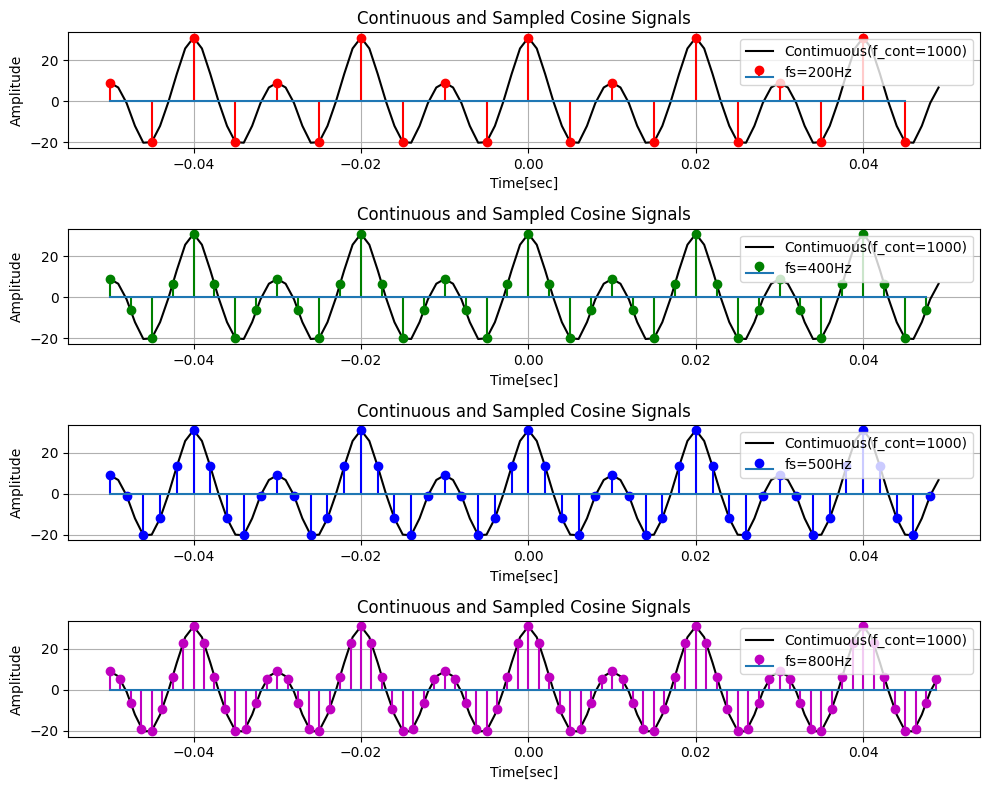

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 파라미터
Duration = [-0.05,0.05]
A1, f1 = 10, 100*np.pi
A2, f2 = 20, 200*np.pi
A3, f3 = 1, 500*np.pi

# (a)연속신호(fs_cont = 1000)
fs_cont = 1000
t_cont = np.arange(Duration[0],Duration[1],1/fs_cont)
cos_wave_cont = A1*np.cos(f1*t_cont) + A2*np.cos(f2*t_cont) + A3*np.cos(f3*t_cont)

plt.figure(figsize=(10,8))
# plt.show()

#(b)이산신호 stem plot(fs = 200,400,500,800)
fs_list = [200,400,500,800]
colors = ['r','g','b','m']
for i,(fs,c) in enumerate(zip(fs_list,colors)):
  t = np.arange(Duration[0],Duration[1],1/fs)
  cos_wave = A1*np.cos(f1*t) + A2*np.cos(f2*t) + A3*np.cos(f3*t)
  plt.subplot(len(fs_list),1,i+1)
  plt.plot(t_cont,cos_wave_cont,c = 'black',label='Contimuous(f_cont=1000)')
  plt.stem(t,cos_wave,label=f'fs={fs}Hz',linefmt=c+'-',markerfmt=c+'o',basefmt="")
  plt.title('Continuous and Sampled Cosine Signals')
  plt.xlabel('Time[sec]'), plt.ylabel('Amplitude')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

##FSK(Frequency Shift Keying) : 디지털 통신에서 0/1을 각각 다른 주파수의 정현파로 표현

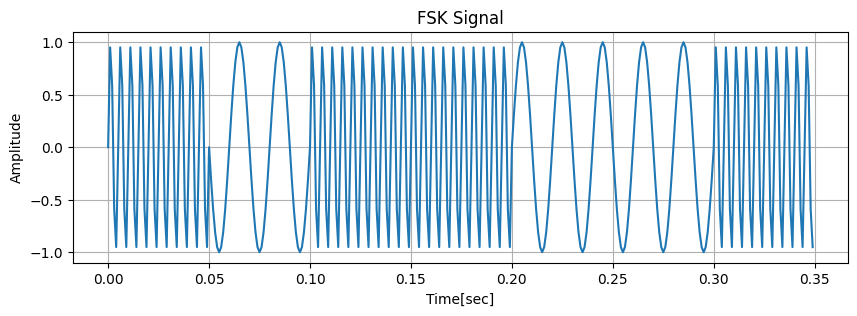

In [ ]:
#파라미터
bit_seq = [1,0,1,1,0,0,1]
f0 = 50 #0에 해당
f1 = 200 #1에 해당
fs = 1000 #샘플링레이트
Tb = 0.05 # 한 비트 지속 기간(초)

signal = []
t_total = []

for i,bit in enumerate(bit_seq):
  t = np.arange(i*Tb,(i+1)*Tb,1/fs)
  if bit == 0:
    s = np.sin(2*np.pi*f0*t)
  else:
    s = np.sin(2*np.pi*f1*t)
  signal.extend(s)
  t_total.extend(t)

plt.figure(figsize=(10,3))
plt.plot(t_total,signal)
plt.title('FSK Signal')
plt.xlabel('Time[sec]'), plt.ylabel('Amplitude')
plt.grid()
plt.show()

--------------------------------------------------------------------------------

# 9/18/목

DTMF: Dual Tone(정현파 2개) Multi Frequency


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pygame
import pygame.mixer
from time import sleep
from scipy import signal, misc
from scipy.io import wavfile
def Play_sound(filename):
  pygame.mixer.init()
  sound = pygame.mixer.Sound(filename)
  tmp = sound.play()
  while tmp.get_busy():
      pygame.time.delay(1)

#DTMF 주파수 테이블(행,열)
dtmf_freqs = {
    '1':{697,1209},'2':{697,1336},'3':{697,1477},
    '4':{770,1209},'5':{770,1336},'6':{770,1477},
    '7':{852,1209},'8':{852,1336},'9':{852,1477},
    '*':{941,1209},'0':{941,1336},'#':{941,1477},
}

def make_dtmf_tone(key,A=5000,fs=8000,tu=0.5):
  if key not in dtmf_freqs:
    raise ValueError('DTMF 키패드(0-9,*,#)만 입력하세요.')
  freq_low,freq_high = dtmf_freqs[key]
  sample_num = int(fs*tu)
  tone = [(A*np.sin(2*np.pi*freq_low/fs*x)
        + A*np.sin(2*np.pi*freq_high/fs*x))/2 for x in range(sample_num)]
  tone = np.asarray(tone,dtype=np.int16)
  return tone,fs

#키패드 입력받기
key = input('DTMF 키패드(0-9,*,#)만 입력하세요: ')
tone,fs = make_dtmf_tone(key)

wavfile.write("Tone.wav", fs, tone)
Play_sound("Tone.wav")

DTMF 키패드(0-9,*,#)만 입력하세요: 0


error: ALSA: Couldn't open audio device: No such file or directory

## 잡음 신호 만들기

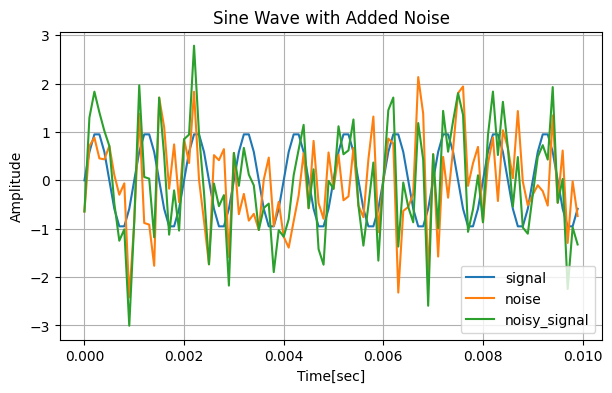

In [ ]:
fs = 10000
Duration = 0.01
t = np.arange(0, Duration, 1/fs)

f0 = 1000
A = 1
noise_level = 1

signal = A * np.sin(2* np.pi * f0 * t)
noise = np.random.randn(len(t)) * noise_level # randn : 평균,분산 1
noisy_signal = signal + noise

import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.title('Sine Wave with Added Noise')
plt.xlabel('Time[sec]'), plt.ylabel('Amplitude')
plt.plot(t,signal, label = 'signal')
plt.plot(t, noise,label = 'noise')
plt.plot(t, noisy_signal, label = 'noisy_signal')
plt.legend()
plt.grid()


In [ ]:
# SNR // S: 신호의 평균 파워(제곱), N : 잡음의 평균 파워
def snr(signal,noise):
  signal_power = np.mean(signal**2)
  noise_power = np.mean(noise**2)
  snr = 10*np.log10(signal_power/noise_power)
  return snr

print(f"SNR(dB):{snr(signal,noise)}")

SNR(dB):-2.4570485566774027


## 목표 SNR 만들기

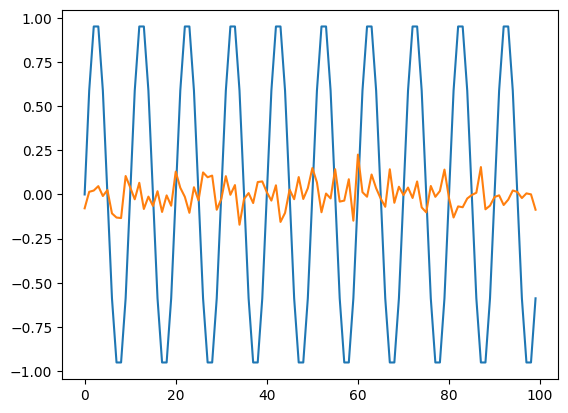

In [ ]:
def noise_for_snr(signal,target_snr):
  signal_power = np.mean(signal**2)
  noise_power = signal_power / (10**(target_snr/10))
  noise = np.random.randn(len(signal)) * np.sqrt(noise_power)
  return noise

plt.plot(signal)
plt.plot(noise_for_snr(signal,20))

------------------------------------------------------------------------------

# 9/23/화

원하는 SNR 값을 dB로 입력: 10
입력한 SNR(dB) : 10.00,
실제 SNR(dB): 10.00


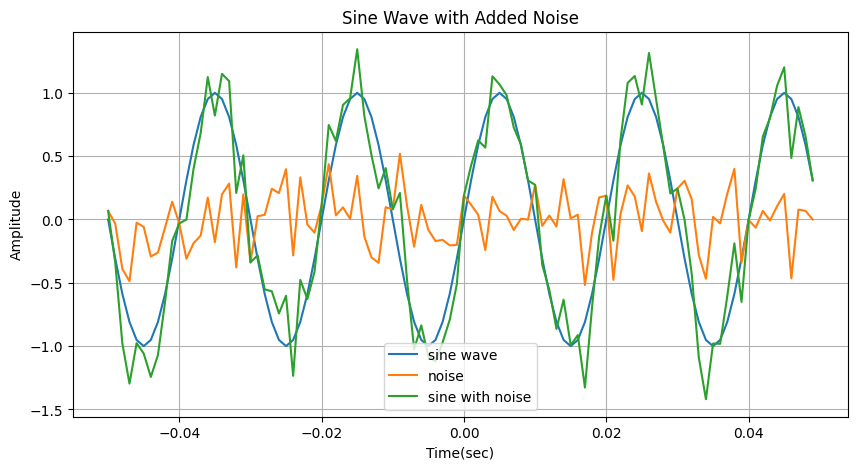

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def noise_for_snr(signal,target_snr):
  signal_power = np.mean(signal**2)
  noise_power = signal_power / (10**(target_snr/10))
  noise = np.random.randn(len(signal)) * np.sqrt(noise_power)
  return noise

# 파라미터
Duration = [-0.05,0.05]
fs_cont = 1000
t_cont = np.arange(Duration[0],Duration[1],1/fs_cont)

# 신호생성 : 정현파
A = 1
f0 = 100*np.pi
signal = A*np.sin(f0*t_cont)

# 목표 SNR(dB) 입력
target_snr_db = float(input('원하는 SNR 값을 dB로 입력: '))

# 잡음 제거 계산
signal_power = np.mean(signal**2)
target_noise_power = (signal_power / (10**(target_snr_db/10)))

noise = np.random.randn(len(t_cont))
noise = noise * np.sqrt(target_noise_power/np.mean(noise**2)) # ?
noisy_signal = signal + noise

# 실제 SNR 계산 및 출력
actual_noise_power = np.mean(noise **2)
actual_snr = 10* np.log10(signal_power/actual_noise_power)
print(f'입력한 SNR(dB) : {target_snr_db:.2f},\n실제 SNR(dB): {actual_snr:.2f}')

# 그래프 그리기
plt.figure(figsize=(10,5))
plt.title('Sine Wave with Added Noise')
plt.plot(t_cont,signal,label='sine wave')
plt.plot(t_cont,noise, label = 'noise')
plt.plot(t_cont,noisy_signal , label ='sine with noise')
plt.xlabel('Time(sec)'),plt.ylabel('Amplitude')
plt.legend()
plt.grid()

TDST(Time Domain Signal )

콘볼루션 뒤집는 이유 : 기차와 플랫폼을 생각해!
  ---->    ( )    
  신호    시스템


In [ ]:
import numpy as np

def convolution(x,h):
  lenA = len(x)
  lenB = len(h)
  y = np.zeros(lenA + lenB -1)
  for m in np.arange(lenA):
    for n in np.arange(lenB):
      y[m+n] =y[m+n] + x[m]*h[n]
  return y

x = [1.,2.,3.,4.,5.]
h = [3.,-1.,2.,1.]
y = convolution(x,h)
print(y)
y = np.convolve(x,h)
print(y)

[ 3.  5.  9. 14. 19.  6. 14.  5.]
[ 3.  5.  9. 14. 19.  6. 14.  5.]


correlation 상관

In [ ]:
import numpy as np

def correlation(x,h):
  return convolution(x,h[::-1])

x = [1.,2.,3.,4.,5.]
h = [3.,-1.,2.,1.]
# cross correlation 교차상관
y = correlation(x,h)
print(y)
# auto correlation 자기상관
y = correlation(x,x)
print(y)

[ 1.  4.  6. 11. 16. 15.  7. 15.]
[ 5. 14. 26. 40. 55. 40. 26. 14.  5.]


상관 길이:  1999


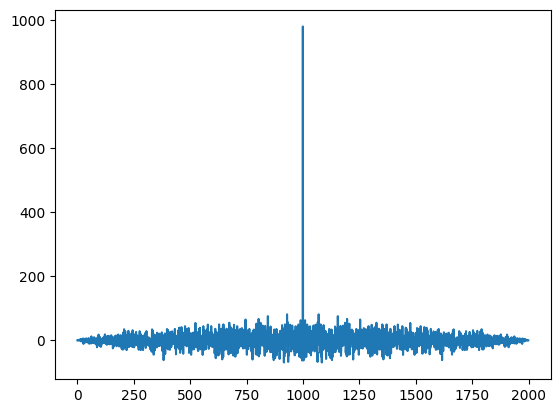

In [ ]:
n = np.random.randn(1000)
R = correlation(n,n)
plt.plot(R)
print('상관 길이: ',len(R))

----------------------------------------------------------------------------------------------------------

# 9/25/목

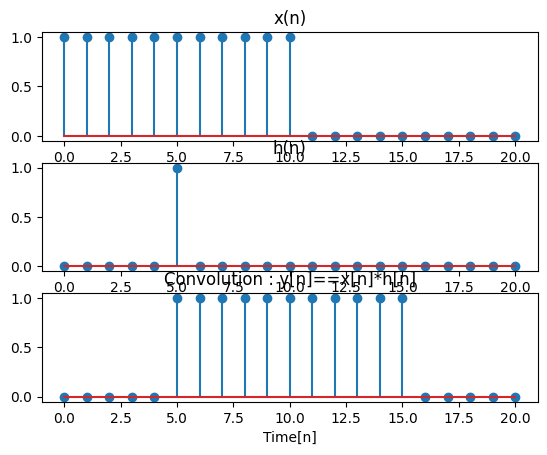

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolution(x,h):
  lenA = len(x)
  lenB = len(h)
  y = np.zeros(lenA + lenB -1)
  for m in np.arange(lenA):
    for n in np.arange(lenB):
      y[m+n] =y[m+n] + x[m]*h[n]
  return y


def correlation(x,h):
  return convolution(x,h[::-1])

tmin = 0
tmax = 20
n = np.arange(tmin,tmax+1)
length = len(n)

x = np.zeros(length)
h = np.zeros(length)
x[0:11] = np.ones(11)
h[5] = 1

y = convolution(x,h)

plt.subplot(311)
plt.stem(n,x)
plt.title('x(n)')
plt.subplot(312)
plt.stem(n,h)
plt.title('h(n)')
plt.subplot(313)
plt.stem(n,y[0:21])
plt.title('Convolution : y[n]==x[n]*h[n]')
plt.xlabel('Time[n]')
plt.show()

In [ ]:
import pygame
import pygame.mixer
from time import sleep
from scipy.io import wavfile


# def Play_sound(filename):
#   pygame.mixer.init()
#   sound = pygame.mixer.Sound(filename)
#   tmp = sound.play()
#   while tmp.get_busy():
#     pygame.time.delay(1)

file = '/content/dt.wav'
# Play_sound(file)

# h = np.ones(10)/10 # LPF
h = np.array([1,-1,1,-1,1,-1,1,-1,1,-1]) #HPF
rate, data = wavfile.read(file)

y = np.convolve(data,h)
y = np.array(y,'int16')
wavfile.write('result.wav',rate,y)
# Play_sound('result.wav')


------------------------------------------------------

# 9/30/화

In [ ]:
# 공기 중 소리의 속도 = 340 m/s
# 이산신호의 샘플링 주파수 = 8k Hz,
# 전파를 쏘고 되돌아오는 신호가 100샘플 뒤에 감지됨,
# 이 소리는 얼마만큼 떨어져 있나?

# 감지된 시간 = t
# t시간 만큼 이동한 거리 = x

# 1:8000 = t:100, t = 1/80
# 1:340 = 1/80 : x, x = 340/80 = 4.25 m
# x 는 왕복 거리이므로 구하려는 답은 2.125m 이다.

(<Axes: title={'center': 'Ry[n] = Correlation Result'}>,
 Text(0.5, 1.0, 'Ry[n] = Correlation Result'))

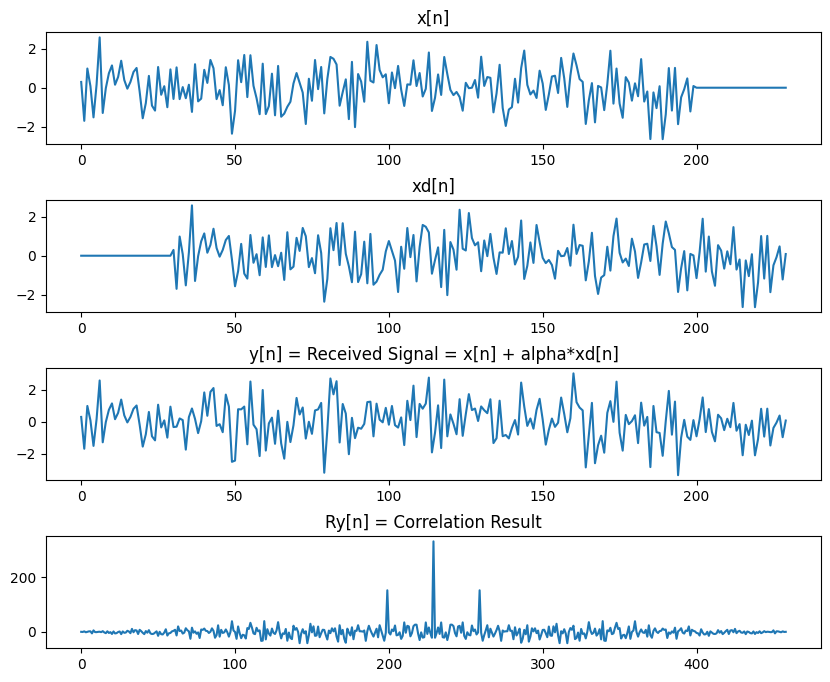

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def convolution(x,h):
  lenA = len(x)
  lenB = len(h)
  y = np.zeros(lenA + lenB -1)
  for m in np.arange(lenA):
    for n in np.arange(lenB):
      y[m+n] =y[m+n] + x[m]*h[n]
  return y

def correlation(x,h):
  return convolution(x,h[::-1])

num_samples = 200
D = 30
alpha = 0.8

x = np.zeros(num_samples+D) # 갖다온 신호이니까 딜레이(D)를 추가해줌
n = np.random.randn(num_samples)
x[0:num_samples] = n[:]

xd =  np.zeros(num_samples+D)
# print(xd[D:num_samples+D].shape, x[:len(x)-D].shape)
xd[D:num_samples+D] =x[0:num_samples]

y = x + alpha * xd

# Auto correlation
Ry = correlation(y,y)

plt.figure(figsize = (10,8))
plt.subplots_adjust(hspace=0.5)
plt.subplot(411), plt.plot(x), plt.title('x[n]')
plt.subplot(412), plt.plot(xd), plt.title('xd[n]')
plt.subplot(413), plt.plot(y), plt.title('y[n] = Received Signal = x[n] + alpha*xd[n]')
plt.subplot(414), plt.plot(Ry), plt.title('Ry[n] = Correlation Result')


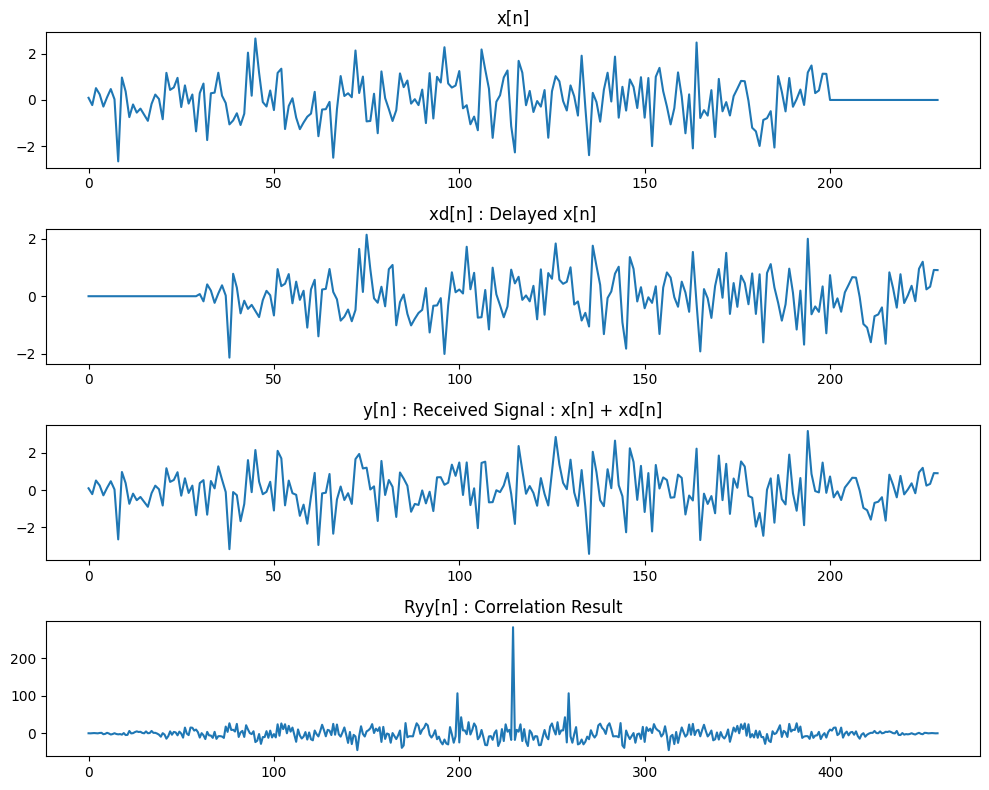

In [12]:
# 석교수님 코드
import numpy as np
import matplotlib.pyplot as plt

def convolution(x, h):
    lengthA=len(x)
    lengthB=len(h)
    y = np.zeros(lengthA + lengthB -1)

    for m in np.arange(lengthA):
        for n in np.arange(lengthB):
            y[m+n] = y[m+n] + x[m]*h[n]
    return y

def correlation(x, h):
    return convolution(x, h[::-1])

num_samples = 200
D = 30
alpha = 0.8

x = np.zeros(num_samples+D)
n = np.random.randn(num_samples)
x[0:num_samples] = n[:]

xd = np.zeros(num_samples+D)
xd[D:num_samples+D] = alpha*x[0:num_samples]

y = x + xd

# Auto-Correlation
Ry = correlation(y,y)

plt.figure(figsize=(10,8))
plt.subplot(411), plt.plot(x), plt.title('x[n]')
plt.subplot(412), plt.plot(xd), plt.title('xd[n] : Delayed x[n]')
plt.subplot(413), plt.plot(y), plt.title('y[n] : Received Signal : x[n] + xd[n]')
plt.subplot(414), plt.plot(Ry), plt.title('Ryy[n] : Correlation Result')
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------

# 10/2/목

[0.5        0.41666667 0.13888889 0.0462963 ]


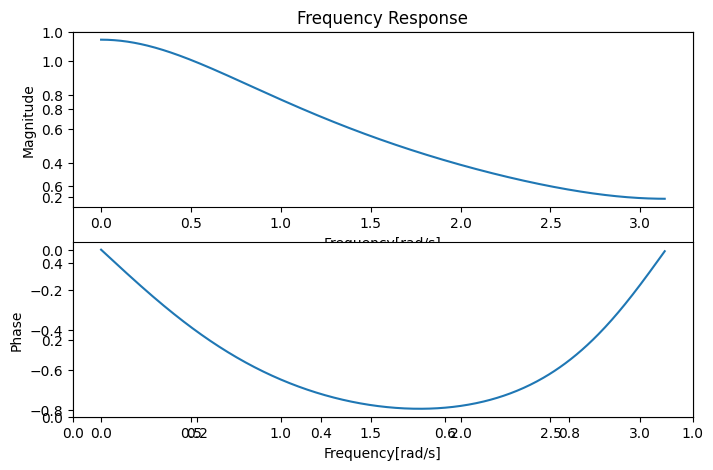

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# y[n] = 1/2*x[n] + 1/4*x[n-1] + 1/3*y[n-1]

# (a) h[n]을 구하시오. 단, 길이는 4
b = np.array([1/2,1/4])
a = np.array([1,-1/3])
x = np.array([1.,0.,0.,0.])
# x = np.zeros(20)
# x[0] = 1.0
y = signal.lfilter(b,a,x) # h[n]
print(y)



# (b) 이 시스템의 특징
w,h = signal.freqz(b,a) # w : 축, h: 값
# Mag = 20*np.log10(np.abs(h))
Mag = np.abs(h)
Pha = np.angle(h)

plt.figure(figsize=(8,5))
plt.title('Frequency Response')
plt.subplot(211), plt.plot(w,Mag),plt.xlabel('Frequency[rad/s]'),plt.ylabel('Magnitude')
plt.subplot(212), plt.plot(w,Pha),plt.xlabel('Frequency[rad/s]'),plt.ylabel('Phase')
plt.show()


[0.5 0.5 0.5 0.5 0.5]


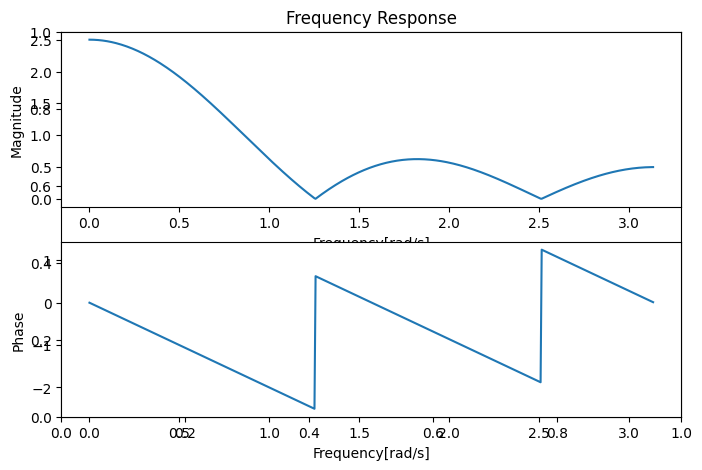

In [14]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# y[n] = 1/2*x[n] + 1/2*x[n-1] + 1/2*x[n-2] + 1/2*x[n-3] + 1/2*x[n-4]

# (a) h[n]을 구하시오. 단, 길이는 5
b = np.array([1/2,1/2,1/2,1/2,1/2])
a = np.array([1])
x = np.zeros(5)
x[0] = 1.0
y = signal.lfilter(b,a,x) # h[n]
print(y)



# (b) 이 시스템의 특징
w,h = signal.freqz(b,a) # w : 축, h: 값
# Mag = 20*np.log10(np.abs(h))
Mag = np.abs(h)
Pha = np.angle(h)

plt.figure(figsize=(8,5))
plt.title('Frequency Response')
plt.subplot(211), plt.plot(w,Mag),plt.xlabel('Frequency[rad/s]'),plt.ylabel('Magnitude')
plt.subplot(212), plt.plot(w,Pha),plt.xlabel('Frequency[rad/s]'),plt.ylabel('Phase')
plt.show()


[0.5 0.5 0.5 0.5 0.5]


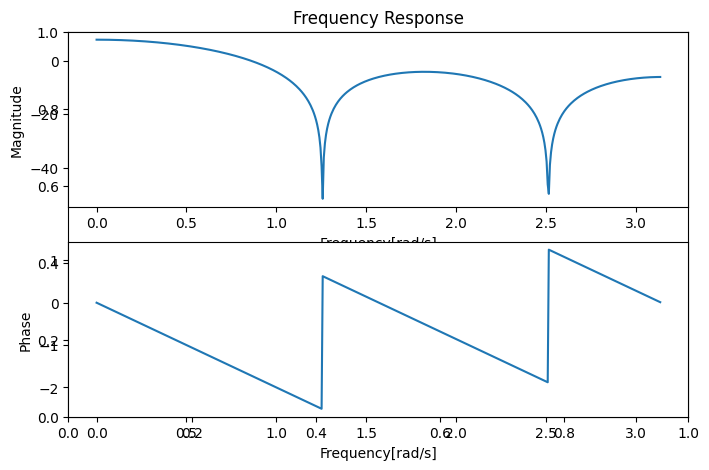

In [13]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# y[n] = 1/2*x[n] + 1/2*x[n-1] + 1/2*x[n-2] + 1/2*x[n-3] + 1/2*x[n-4]

# (a) h[n]을 구하시오. 단, 길이는 5
b = np.array([1/2,1/2,1/2,1/2,1/2])
a = np.array([1])
x = np.zeros(5)
x[0] = 1.0
y = signal.lfilter(b,a,x) # h[n]
print(y)



# (b) 이 시스템의 특징
w,h = signal.freqz(b,a) # w : 축, h: 값
Mag = 20*np.log10(np.abs(h))
# Mag = np.abs(h)
Pha = np.angle(h)

plt.figure(figsize=(8,5))
plt.title('Frequency Response')
plt.subplot(211), plt.plot(w,Mag),plt.xlabel('Frequency[rad/s]'),plt.ylabel('Magnitude')
plt.subplot(212), plt.plot(w,Pha),plt.xlabel('Frequency[rad/s]'),plt.ylabel('Phase')
plt.show()


----------------------------------------------------------------------------------------------------

# 10/14/화

In [ ]:
import numpy as np

def convolution(x, h):
    lengthA=len(x)
    lengthB=len(h)
    y = np.zeros(lengthA + lengthB -1)

    for m in np.arange(lengthA):
        for n in np.arange(lengthB):
            y[m+n] = y[m+n] + x[m]*h[n]
    return y

x = [1., 2., 3., 4., 5. ]
h = [3., -1., 2., 1. ]
#y = convolution(x,h)
y = np.convolve(x,h)
print(y) # [3, 5, 9, 14, 19, 6, 14, 5]


[ 3.  5.  9. 14. 19.  6. 14.  5.]


pygame 2.6.1 (SDL 2.28.4, Python 3.12.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


/tmp/ipython-input-3985928343.py:6: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import signal, misc


[0.5 0.5 0.5 0.5 0.5]


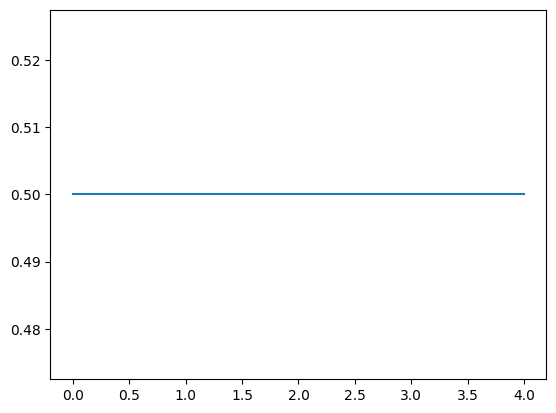

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pygame
import pygame.mixer
from time import sleep
from scipy import signal, misc
from scipy.io import wavfile

def Play_sound(filename):
    pygame.mixer.init()
    sound = pygame.mixer.Sound(filename)
    tmp = sound.play()
    while tmp.get_busy():
        pygame.time.delay(1)

x = np.array([1.,0.,0.,0.,0.])
b = np.array([0.5, 0.5, 0.5, 0.5, 0.5])
a = np.array([1.0])
y = signal.lfilter(b, a, x)
print(y)
plt.plot(y)
plt.show()

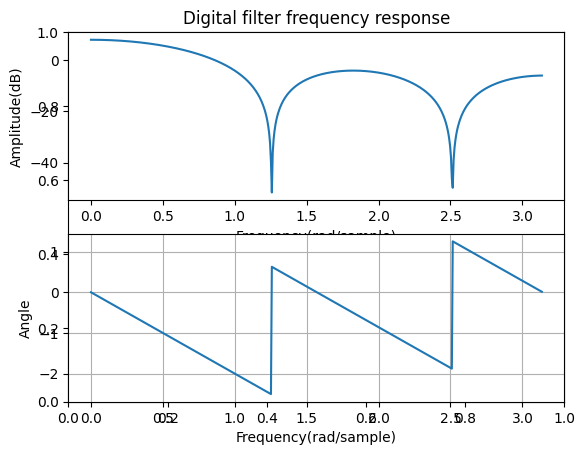

In [ ]:
w, h = signal.freqz(b,a)
Mag = 20*np.log10(np.abs(h))
Ang = np.angle(h)

plt.title('Digital filter frequency response')
plt.subplot(211), plt.plot(w, Mag), plt.ylabel('Amplitude(dB)'), plt.xlabel('Frequency(rad/sample)')
plt.subplot(212), plt.plot(w, Ang), plt.ylabel('Angle'), plt.xlabel('Frequency(rad/sample)')
plt.grid()
plt.show()

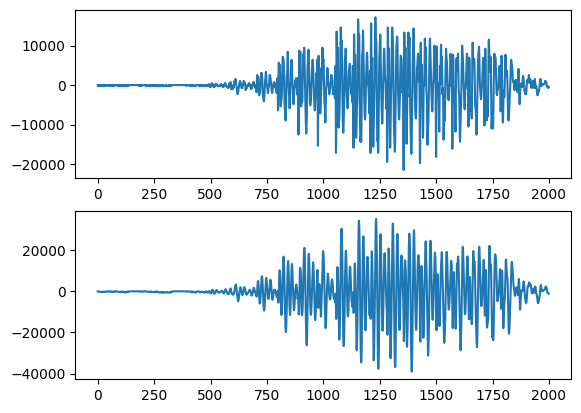

In [16]:
from scipy.io import wavfile


rate, data = wavfile.read('dt.wav')
y1 = signal.lfilter(b, a, data)
plt.subplot(211), plt.plot(data[0:2000])
plt.subplot(212), plt.plot(y1[0:2000])
plt.show()

# y1 = np.asarray(y1, dtype=np.int16)
# wavfile.write('test.wav', rate, y1)
# Play_sound('dt.wav')
# Play_sound('test.wav')

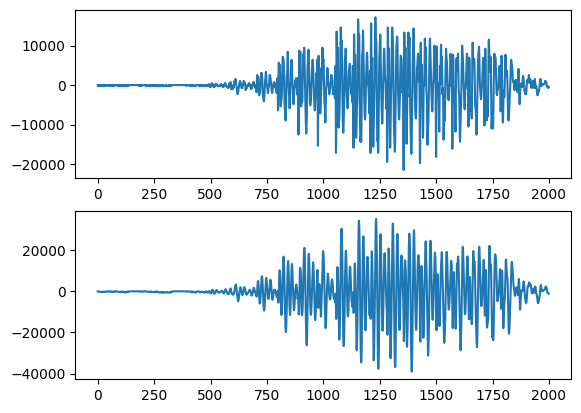

In [17]:

y2 = convolution(data, y)
plt.subplot(211), plt.plot(data[0:2000])
plt.subplot(212), plt.plot(y2[0:2000])
plt.show()

# y2 = np.asarray(y2, dtype=np.int16)
# wavfile.write('test1.wav', rate, y2)
# Play_sound('dt.wav')
# Play_sound('test1.wav')

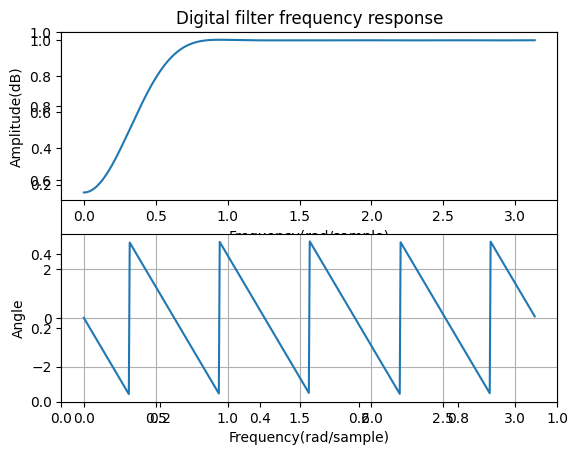

In [ ]:
f = 0.1
numtaps = 21
b = signal.firwin(numtaps, f, pass_zero=False)
a = np.array([1.0])

w, h = signal.freqz(b,a)
Mag = np.abs(h)
Ang = np.angle(h)

plt.title('Digital filter frequency response')
plt.subplot(211), plt.plot(w, Mag), plt.ylabel('Amplitude(dB)'), plt.xlabel('Frequency(rad/sample)')
plt.subplot(212), plt.plot(w, Ang), plt.ylabel('Angle'), plt.xlabel('Frequency(rad/sample)')
plt.grid()
plt.show()

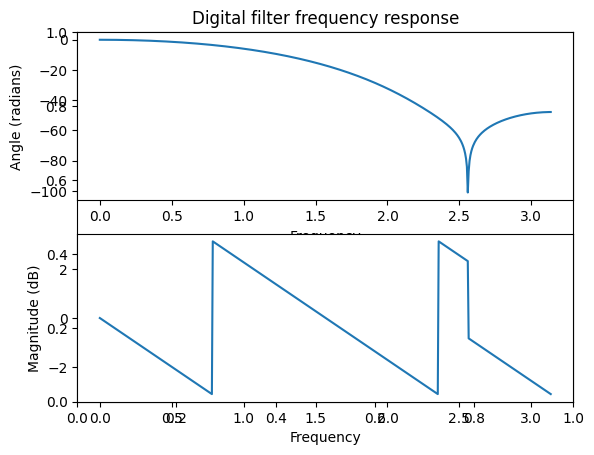

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

f = 0.3
numtaps = 9
filter = signal.firwin(numtaps, f)
a = np.array([1.0])
b = filter

w, h = signal.freqz(b,a)
Mag = 20*np.log10(np.abs(h))
Ang = np.angle(h)

plt.title('Digital filter frequency response')
plt.subplot(211),plt.plot(w,Mag),plt.ylabel('Angle (radians)'),plt.xlabel('Frequency')
plt.subplot(212),plt.plot(w, Ang),plt.ylabel('Magnitude (dB)'),plt.xlabel('Frequency')
plt.show()

----------------------------------------------------------

# 10/16/목

In [ ]:
import pygame
import pygame.mixer
from time import sleep
from scipy import signal
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

def Play_sound(filename):
  pygame.mixer.init()
  sound = pygame.mixer.Sound(filename)
  tmp = sound.play()
  while tmp.get_busy():
    pygame.time.delay(1)

# 지연 신호를 발생하여 원본에 더해서 구현
def Delay(x, alpha, D):
  y = np.zeros(len(x))
  y[0:D-1] = x[0:D-1]
  for i in range(D, len(x)):
    y[i] = x[i] + alpha*x[i-D]

  return y

# 임펄스 응답을 구해 콘볼루션 수행
def Delay_Conv(x,alpha,D):
  h = np.zeros(D)
  y = np.zeros(len(x))
  h[0] = 1.0
  h[D-1] = alpha
  y = signal.convolve(x,h)
  return y


alpha = 0.8
D = 3000
rate, data = wavfile.read('dt.wav')
# 방법 1 : 지연 신호를 발생하여 원본에 더해서 구현
# y = Delay(data, alpha, D)
# 방법 2 : 임펄스 응답을 구해 콘볼루션 수행
# y = Delay_Conv(data, alpha, D)

# 방법 3 : 입출력 관계식을 Z변환 이용
a = np.array([1.0])
b = np.zeros(D+1)
b[0] = 1.0
b[D] = alpha
y = signal.lfilter(b,a,data)


y = np.asarray(y, dtype=np.int16)
wavfile.write('SingleEcho.wav', rate, y)
Play_sound('dt.wav')
Play_sound('SingleEcho.wav')

error: ALSA: Couldn't open audio device: No such file or directory

In [ ]:
# 실습문제 5-10 꼭 해보세요!!!!!

In [ ]:
# <Single Echo>
# y[n] = x[n] + alpha * x[n-D]
# z변환 ---> Y[z] = X[z] + alpha * z의 -D승 * X[z],
# 따라서 H[z] = Y[z]/X[z] = (1+alpha * z의 -D승) / 1